In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import pickle

In [11]:
df = pd.read_csv('data.csv')

print(df.head())
X = df['Rim_Center_X'].values.reshape(-1, 1)
y_speed = df['Speed'].values
y_angle = df['Angle'].values 

   Speed      Angle  Rim_Center_X
0  102.0  64.798876           280
1  102.0  74.827085           377
2  102.0  66.583969           547
3  102.0  74.396053           296
4  102.0  82.937397           203


In [12]:
X = pd.DataFrame({
    'Rim_Center_X': df['Rim_Center_X'],
    'Speed_Squared': df['Speed']**2,
    'Sin_2Theta': np.sin(2 * np.radians(df['Angle']))
})

y_speed = df['Speed'].values
y_angle = df['Angle'].values

speed_model = LinearRegression()
speed_model.fit(X, y_speed)

angle_model = LinearRegression()
angle_model.fit(X, y_angle)

print("Speed Model:")
print(f"R2 Score: {speed_model.score(X, y_speed):.3f}")
print("Coefficients:")
print(pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': speed_model.coef_
}))

print("\nAngle Model:")
print(f"R2 Score: {angle_model.score(X, y_angle):.3f}")
print("Coefficients:")
print(pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': angle_model.coef_
}))

Speed Model:
R2 Score: 0.998
Coefficients:
         Feature  Coefficient
0   Rim_Center_X     0.000389
1  Speed_Squared     0.005345
2     Sin_2Theta    -0.204156

Angle Model:
R2 Score: 0.952
Coefficients:
         Feature  Coefficient
0   Rim_Center_X     0.003093
1  Speed_Squared     0.001255
2     Sin_2Theta   -41.391212


In [13]:
with open('speed_model.pkl', 'wb') as f:
    pickle.dump(speed_model, f)

with open('angle_model.pkl', 'wb') as f:
    pickle.dump(angle_model, f)

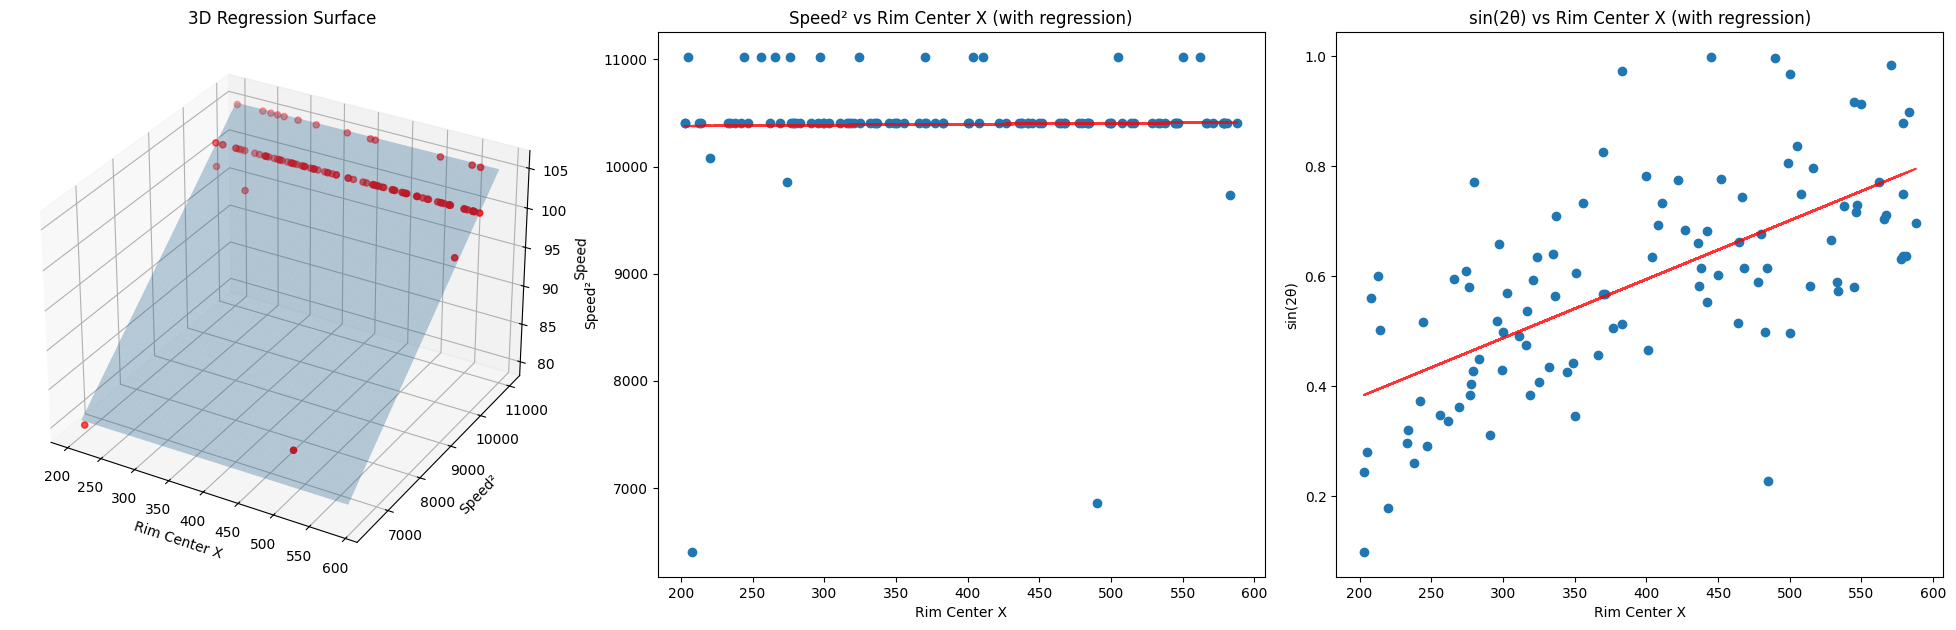

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create figure with subplots
fig = plt.figure(figsize=(20, 12))

# 3D Plot
ax1 = fig.add_subplot(231, projection='3d')
x_surf = np.linspace(X['Speed_Squared'].min(), X['Speed_Squared'].max(), 100)
y_surf = np.linspace(X['Sin_2Theta'].min(), X['Sin_2Theta'].max(), 100)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
z_surf = speed_model.intercept_ + \
         speed_model.coef_[1] * x_surf + \
         speed_model.coef_[2] * y_surf + \
         speed_model.coef_[0] * np.mean(X['Rim_Center_X'])
ax1.plot_surface(x_surf, y_surf, z_surf, alpha=0.3)
ax1.scatter(X['Speed_Squared'], X['Sin_2Theta'], X['Rim_Center_X'], c='r', marker='o')
ax1.set_xlabel('Speed²')
ax1.set_ylabel('sin(2θ)')
ax1.set_zlabel('Rim Center X')
ax1.set_title('3D Regression Surface')



# Speed² vs Rim Center X planar regression
ax4 = fig.add_subplot(232)
ax4.scatter(X['Rim_Center_X'], X['Speed_Squared'])
z = np.polyfit(X['Rim_Center_X'], X['Speed_Squared'], 1)
p = np.poly1d(z)
ax4.plot(X['Rim_Center_X'], p(X['Rim_Center_X']), "r--", alpha=0.8)
ax4.set_xlabel('Rim Center X')
ax4.set_ylabel('Speed²')
ax4.set_title('Speed² vs Rim Center X (with regression)')

# sin(2θ) vs Rim Center X planar regression
ax5 = fig.add_subplot(233)
ax5.scatter(X['Rim_Center_X'], X['Sin_2Theta'])
z = np.polyfit(X['Rim_Center_X'], X['Sin_2Theta'], 1)
p = np.poly1d(z)
ax5.plot(X['Rim_Center_X'], p(X['Rim_Center_X']), "r--", alpha=0.8)
ax5.set_xlabel('Rim Center X')
ax5.set_ylabel('sin(2θ)')
ax5.set_title('sin(2θ) vs Rim Center X (with regression)')

plt.tight_layout()
plt.show()